# Ensemble Learning and Random Forests

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ensemble Learning

A group of predictors is often better than one very good predictor (wisdom of the crowd).
Ensemble learning uses this concept to do classification and regression.

## Voting Classifiers

Each classifier states their class and the most frequent class (class with more votes) is chosen as the Ensemble Classification label.

In [2]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [11]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42)),
])
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [13]:
for name, classifier in voting_classifier.named_estimators_.items():
    print(name, '=', classifier.score(X_test, y_test))
print("Ensemble =", voting_classifier.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896
Ensemble = 0.912


### Soft Voting

If the algorithms inside the ensemble can predict the probability of each class we can change the rules of the voting. Soft Voting promotes a voting scenario where each decision is accompanied by the grade of confidence it has.

In short terms classifiers that have high degree of confidence into their classifications will have a more significant vote.

In [14]:
voting_classifier.voting = 'soft'
voting_classifier.named_estimators['svc'].probability = True
voting_classifier.fit(X_train, y_train)
voting_classifier.score(X_test, y_test)

0.92

## Bagging and Pasting

Instead of feeding each algorithm in an ensemble with all the training data we can feed it a random subset to each algorithm.

- If this each sample is exclusive to one subset, we are in the presence of **Pasting**;
- If a sample may appear in several subsets, we are in the presence of **Bagging**.

Example: Imagine we choose 10 cards from a deck.
- Pasting occurs when we take all 10 cards;
- Bagging occurs when we take 1 card and put it back in the deck ten times.

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_classifier = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, random_state=42, n_jobs=-1)
bag_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [44]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(["#fafab0", "#9898ff"])

def draw_decision_boundary(classifier, X, y, ax0, ax1, ax2, ax3):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'go')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'r^')

    x1s, x2s = np.meshgrid(np.linspace(ax0, ax1, 100), np.linspace(ax2, ax3, 100))
    xs_all = np.c_[x1s.ravel(), x2s.ravel()]
    y_predicted = classifier.predict(xs_all).reshape(x1s.shape)

    plt.contourf(x1s, x2s, y_predicted, cmap=color_map)
    plt.contour(x1s, x2s, y_predicted, cmap="Greys", alpha=0.8)

Text(0, 0.5, 'x2')

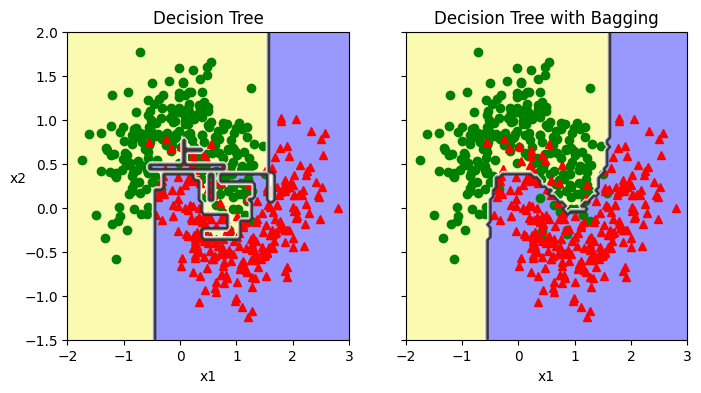

In [48]:
figure, (ax0, _) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 4))

draw_decision_boundary(bag_classifier, X, y, -2, 3, -1.5, 2.0)
plt.title("Decision Tree with Bagging")
plt.xlabel('x1')

plt.sca(ax0)
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
draw_decision_boundary(tree_classifier, X, y, -2, 3, -1.5, 2.0)
plt.title("Decision Tree")
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)